# ASSIGNMENT 1

## Reading in the dataset

In [9]:
f <- read.csv('assignment.csv')
head(f, 15)

Instructor,Grade,Words.per.minute,Proofreading,Spreadsheet,Statistics
Dr. Katz,6,35,53,75,61
Dr. Katz,6,50,77,24,51
Dr. Katz,6,55,71,62,55
Dr. Katz,6,60,78,27,91
Dr. Katz,6,65,84,44,95
Dr. Katz,6,60,79,38,50
Dr. Katz,6,70,96,12,94
Dr. Katz,6,55,61,55,76
Dr. Katz,6,45,73,59,75
Dr. Katz,6,55,75,55,80


## Correlation using Pearson's Correlation

Below is the correlation table generated for the attributes of the given data using Pearson's correlation. As we can see, the maximum correlation in this data is between the variables **Words.per.minute** and **Proofreading** with a value of ***0.71***

**Statistics** and **Grade** are two variables with positive correlation, whereas the variables **Spreadsheet** and **Grade** have a negative correlation 

In [73]:
correlation <- cor(f[,2:length(f)], method="pearson")
correlation
maxcor <- max(correlation[correlation!=max(correlation)])
paste("Max correlation: ", maxcor)

,Grade,Words.per.minute,Proofreading,Spreadsheet,Statistics
Grade,1.00000000,0.33197722,0.05455987,-0.0528161,0.06500347
Words.per.minute,0.33197722,1.00000000,0.71705844,-0.6128279,-0.07822959
Proofreading,0.05455987,0.71705844,1.00000000,-0.7932430,-0.12590040
Spreadsheet,-0.05281610,-0.61282789,-0.79324297,1.0000000,0.12052698
Statistics,0.06500347,-0.07822959,-0.12590040,0.1205270,1.00000000


[1] "Max correlation:  0.717058440864125"

## Considering the correlation between *Spreadsheet* and *Proofreading*

**r** coefficient from Pearson's correlation: -0.79<br>
**tau** from Kendall's rank correlation: -0.57<br>
**rho** from Spearman rank-order correlation: -0.75

In [76]:
cor.test(~f$Spreadsheet + ~f$Proofreading, method="pearson")
cor.test(~f$Spreadsheet + ~f$Proofreading, method="kendall")
cor.test(~f$Spreadsheet + ~f$Proofreading, method="spearman")


	Pearson's product-moment correlation

data:  f$Spreadsheet and f$Proofreading
t = -7.5962, df = 34, p-value = 7.97e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8898707 -0.6284997
sample estimates:
      cor 
-0.793243 


Warning message in cor.test.default(x = c(75, 24, 62, 27, 44, 38, 12, 55, 59, 55, :
“Cannot compute exact p-value with ties”


	Kendall's rank correlation tau

data:  f$Spreadsheet and f$Proofreading
z = -4.888, p-value = 1.019e-06
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.5792888 


Warning message in cor.test.default(x = c(75, 24, 62, 27, 44, 38, 12, 55, 59, 55, :
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  f$Spreadsheet and f$Proofreading
S = 13634, p-value = 1.057e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.7546574 


## Linear regression between *Proofreading* and *Words.per.minute*

### *p* value and *r<sup>2</sup>* value
From the summary of the linear regression performed below, we can infer the following:

**p** value: 8.647 x 10<sup>-7</sup><br>
**r<sup>2</sup>** value: 0.5142


In [127]:
linear_regression <- lm(Proofreading ~ Words.per.minute, data=f)
modelSummary <- summary(linear_regression)
modelSummary


Call:
lm(formula = Proofreading ~ Words.per.minute, data = f)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.4164  -6.2000   0.2992   6.4264  12.4600 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       17.9003    10.0360   1.784   0.0834 .  
Words.per.minute   0.9753     0.1626   5.999 8.65e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.497 on 34 degrees of freedom
Multiple R-squared:  0.5142,	Adjusted R-squared:  0.4999 
F-statistic: 35.98 on 1 and 34 DF,  p-value: 8.647e-07


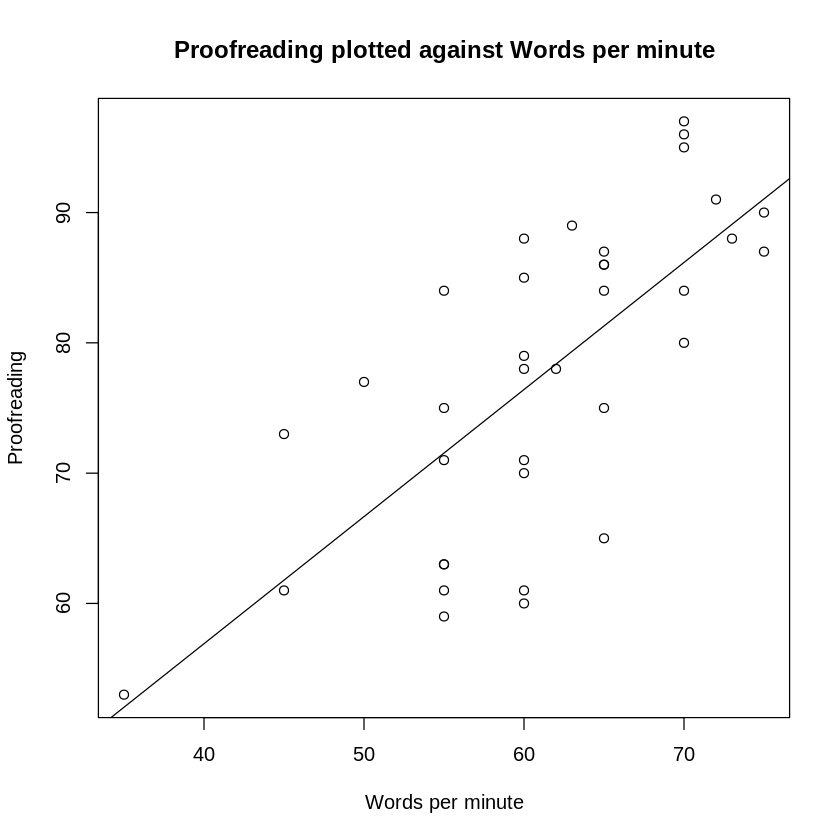

In [131]:
plot(f$Words.per.minute, f$Proofreading, xlab="Words per minute", ylab="Proofreading", main="Proofreading plotted against Words per minute")
abline(17.9003, 0.9753) #Coefficients of intercept and Words.per.minute

### Plotting the residuals

By plotting the residuals, we can see that the points are scattered across the horizontal axis randomly, rather than in a pattern. This shows that the linear regression model is appropriate for this case

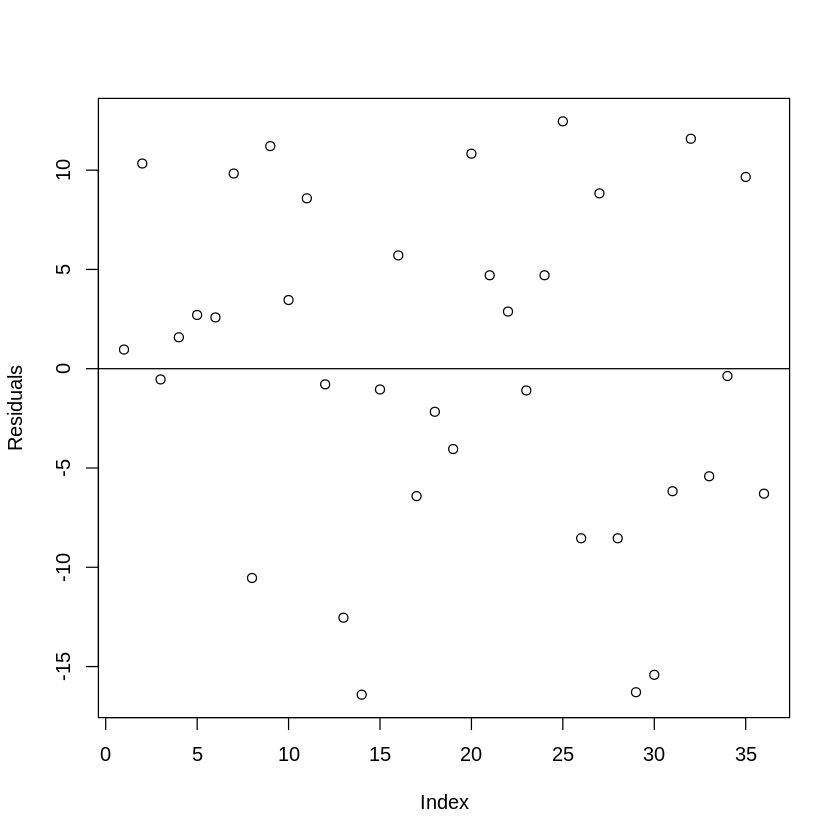

In [122]:
plot(modelSummary$residuals, ylab="Residuals")
abline(0,0)